# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import os
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
units = "metric"


Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# Print (url)


# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | ixmiquilpan
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | camarinas
Processing Record 6 of Set 1 | ust'-ordynskiy
Processing Record 7 of Set 1 | san pascual
Processing Record 8 of Set 1 | prince rupert
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | zelenogorsk
Processing Record 11 of Set 1 | huamachuco
Processing Record 12 of Set 1 | alice springs
Processing Record 13 of Set 1 | glace bay
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | pitimbu
Processing Record 18 of Set 1 | levelland
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | taiohae
City not found. Skipping ...
-----------------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
Lat = city_data_df["Lat"]
maxtemp =city_data_df["Max Temp"]
humid = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
windspeed = city_data_df["Windspeed"]

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Windspeed     593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,60.46,96,99,17.22,SH,1715557932
1,ixmiquilpan,20.4833,-99.2333,86.14,32,52,19.89,MX,1715557932
2,alofi,-19.0595,-169.9187,80.49,69,100,20.71,NU,1715557932
3,waitangi,-43.9535,-176.5597,53.82,82,89,8.01,NZ,1715557933
4,camarinas,43.1311,-9.1817,61.93,95,100,15.12,ES,1715557933


In [6]:
#I wrote this code because it kept saying i have no output_dat directory

output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,60.46,96,99,17.22,SH,1715557932
1,ixmiquilpan,20.4833,-99.2333,86.14,32,52,19.89,MX,1715557932
2,alofi,-19.0595,-169.9187,80.49,69,100,20.71,NU,1715557932
3,waitangi,-43.9535,-176.5597,53.82,82,89,8.01,NZ,1715557933
4,camarinas,43.1311,-9.1817,61.93,95,100,15.12,ES,1715557933


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

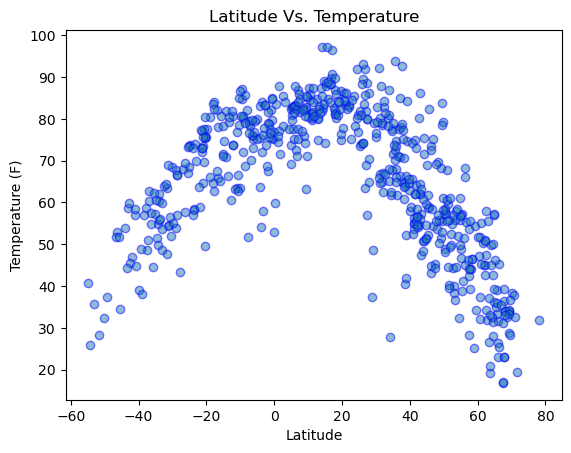

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(Lat, maxtemp, edgecolor="blue", linewidth=1,
            marker="o", alpha = 0.5 )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude Vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

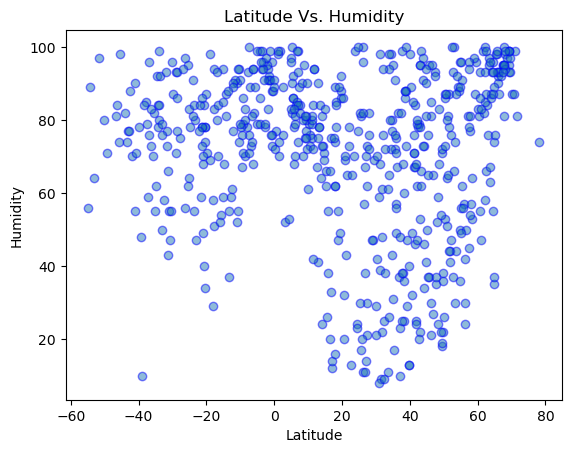

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(Lat, humid, edgecolor="blue", linewidth=1,
            marker="o", alpha = 0.5 )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude Vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

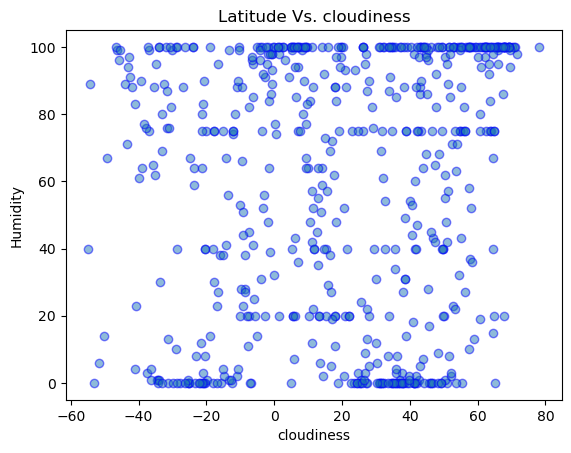

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(Lat, cloudiness, edgecolor="blue", linewidth=1,
            marker="o", alpha = 0.5 )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude Vs. cloudiness")
plt.ylabel("Humidity")
plt.xlabel("cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

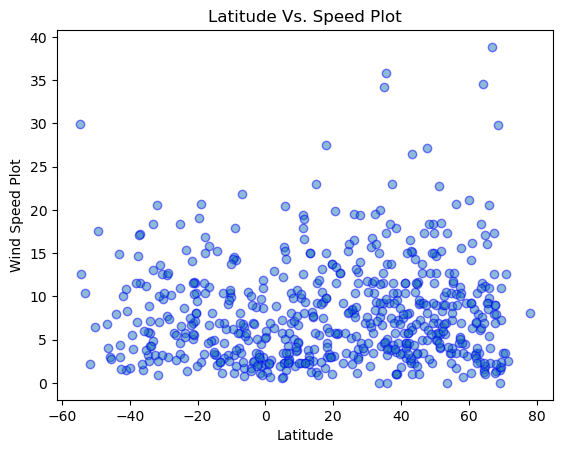

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(Lat, windspeed, edgecolor="blue", linewidth=1,
            marker="o", alpha = 0.5 )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude Vs. Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed Plot")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE




In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.query("Lat > 0")

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
1,ixmiquilpan,20.4833,-99.2333,86.14,32,52,19.89,MX,1715557932
4,camarinas,43.1311,-9.1817,61.93,95,100,15.12,ES,1715557933
5,ust'-ordynskiy,52.8050,104.7508,44.33,37,23,10.00,RU,1715557933
6,san pascual,13.7975,121.0342,87.51,64,51,8.25,PH,1715557933
7,prince rupert,54.3161,-130.3201,51.89,89,100,12.66,CA,1715557933


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.query("Lat < 0")
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,60.46,96,99,17.22,SH,1715557932
2,alofi,-19.0595,-169.9187,80.49,69,100,20.71,NU,1715557932
3,waitangi,-43.9535,-176.5597,53.82,82,89,8.01,NZ,1715557933
10,huamachuco,-7.8000,-78.0667,51.66,93,11,4.09,PE,1715557933
11,alice springs,-23.7000,133.8833,58.55,55,64,5.75,AU,1715557653


###  Temperature vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Max Temp')

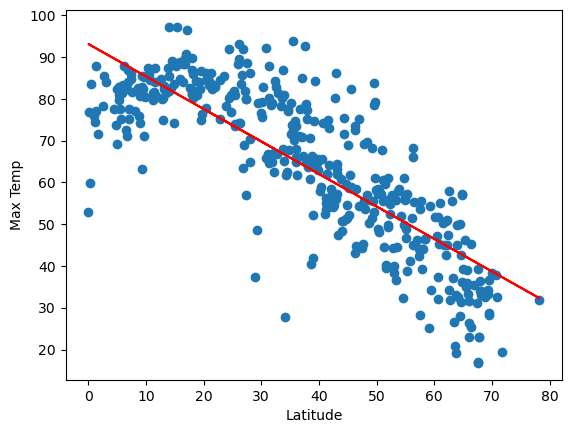

In [25]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

Text(0, 0.5, 'Max Temp')

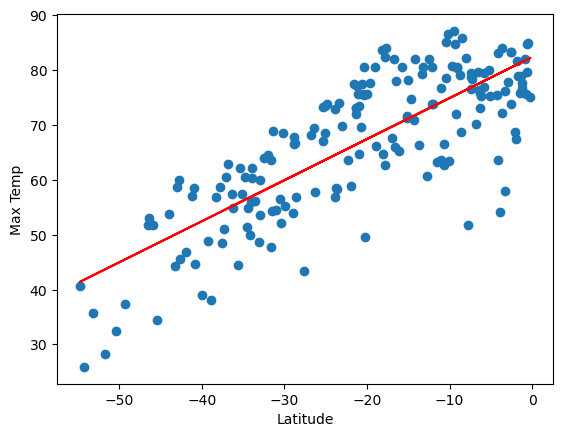

In [26]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Humidity')

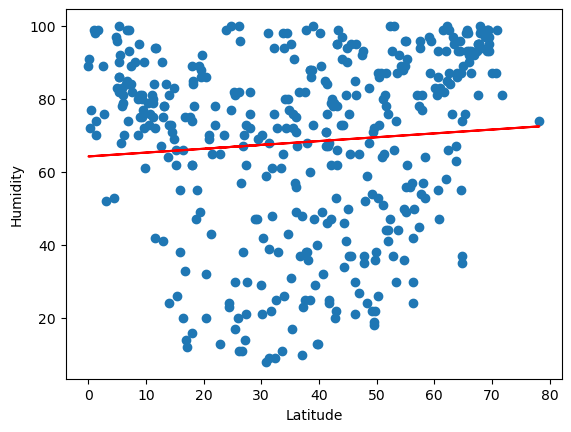

In [29]:
# Northern Hemisphere
# YOUR CODE 

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

Text(0, 0.5, 'Humidity')

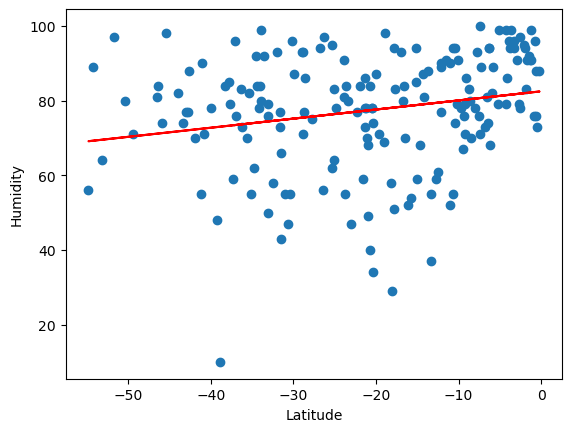

In [30]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Cloudiness')

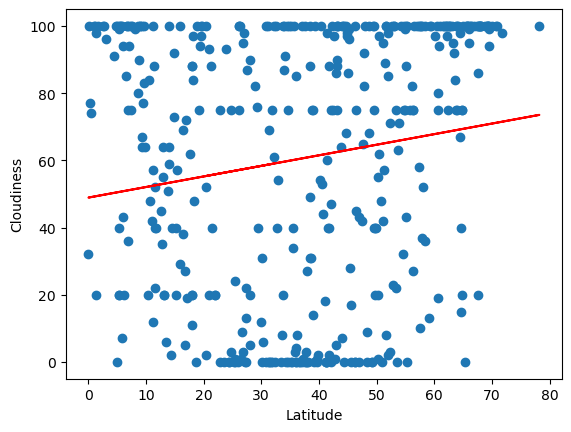

In [32]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

Text(0, 0.5, 'Cloudiness')

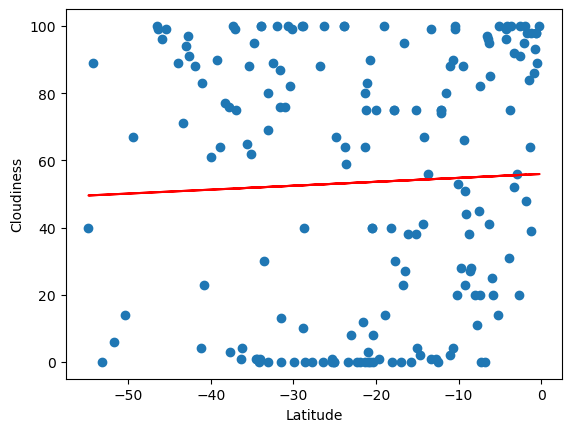

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Windspeed')

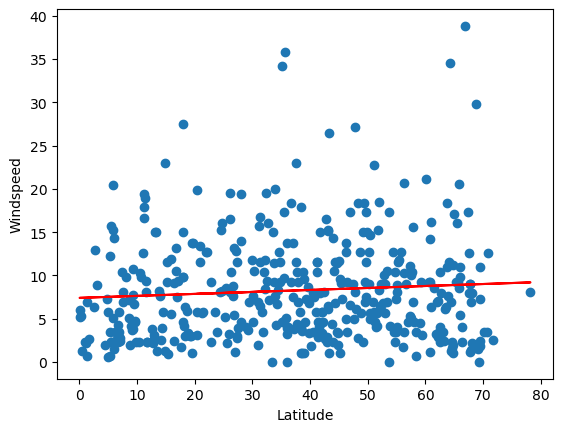

In [37]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

Text(0, 0.5, 'Wind Speed')

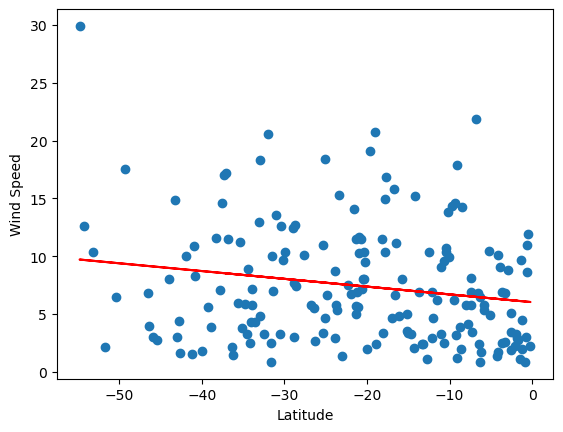

In [39]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Windspeed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE